In [1]:
%cd /Users/rodrigo/Post-Grad/CC400/Repo

/Users/rodrigo/Post-Grad/CC400/Repo


In [2]:
from utils import import_data, compute_KNN_graph, create_graph, create_batch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch_geometric
from torch_geometric.data import Data
from torch_geometric.utils import dense_to_sparse
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_validate
from tqdm import tqdm
from torch_geometric.loader import DataLoader
from sklearn.metrics import roc_curve, auc


%matplotlib inline
sns.set(rc={'image.cmap': 'coolwarm'})

#from numba import jit,prange

import time
import os

SMALL_SIZE = 8
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
          'f1' : 'f1_macro',
          'roc_auc' : 'roc_auc'} 

In [11]:
models = pd.read_csv('/Users/rodrigo/Post-Grad/CC400/Results/linear_reg_age.csv', index_col=0)
models[['test_mae','test_mse']] = models[['test_mae','test_mse']]*(-1)
gcn = pd.read_csv('/Users/rodrigo/Post-Grad/CC400/Results/GCN_age.csv', index_col=0).rename(columns={'acc_test' : 'test_acc'})
gcn['Model'] = 'GCN_MAE'
gcn_mse = pd.read_csv('/Users/rodrigo/Post-Grad/CC400/Results/GCN_age_mse.csv', index_col=0).rename(columns={'acc_test' : 'test_acc'})
gcn_mse['Model'] = 'GCN_MSE'


In [12]:
models = models.merge(gcn, how='outer')
models = models.merge(gcn_mse, how='outer')

In [14]:
models.columns

Index(['fit_time', 'score_time', 'test_mae', 'test_mse', 'Model', 'test_loss'], dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


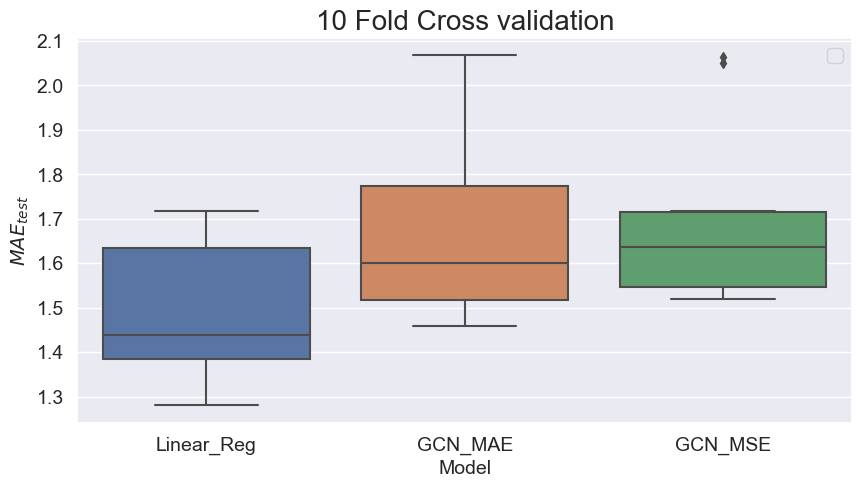

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(models, x='Model', y='test_mae')
#plt.axhline(y = 0.63, color = 'purple', linestyle = '-', label='DummyClassifier')
plt.legend()
plt.ylabel(r'$MAE_{test}$')
plt.title('10 Fold Cross validation')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


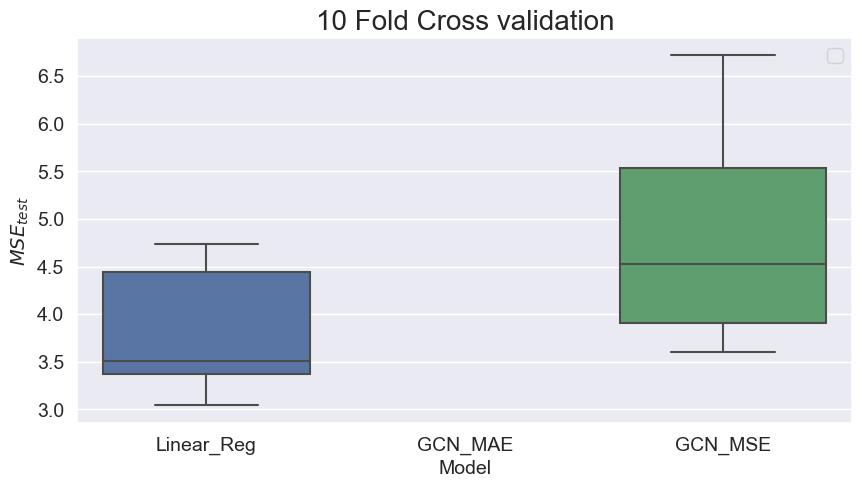

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(models, x='Model', y='test_mse')
#plt.axhline(y = 0.5, color = 'purple', linestyle = '-', label='DummyClassifier')
plt.legend()
plt.ylabel(r'$MSE_{test}$')
plt.title('10 Fold Cross validation')
plt.show()

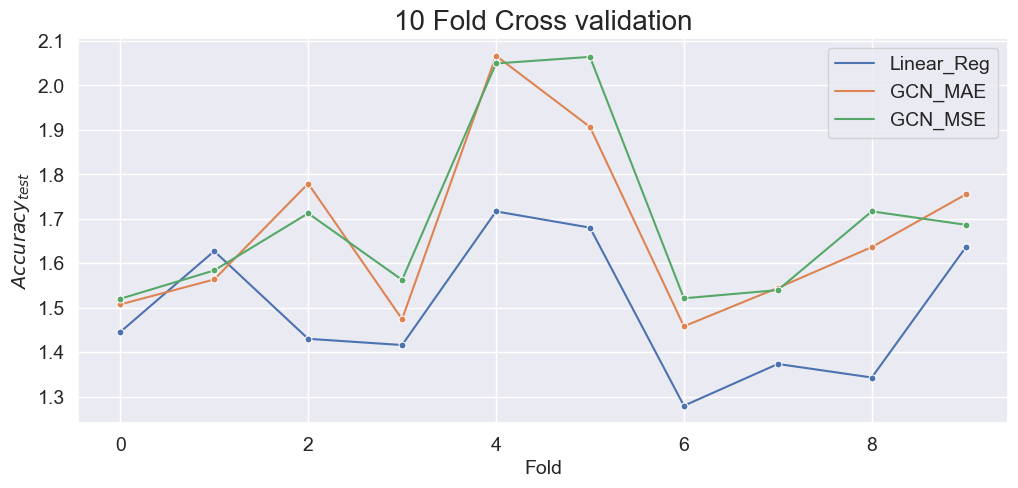

In [18]:
plt.figure(figsize=(12,5))
sns.lineplot(models, x=3*[i for i in range(0,10)], hue='Model', y='test_mae', marker='.', markersize=10)
#plt.axhline(y = 0.63, color = 'purple', linestyle = '-', label='DummyClassifier')
plt.legend()
plt.xlabel('Fold')
plt.ylabel(r'$Accuracy_{test}$')
plt.title('10 Fold Cross validation')
plt.show()